# 3η Εργασία: Βαθιά Μάθηση


Neural Networks - Team 22\
\
Alexandros Tsafos el18211\
Christina Kostaki el18136\
Sofia Vouzika el18843

## Image Captioning

Θέμα της 3ης εργασίας του μαθήματος είναι η Βαθιά Μάθηση. Θα μελετήσουμε
ένα πρόβλημα που συνδυάζει Όραση Υπολογιστών και Επεξεργασία Φυσικής
Γλώσσας. Συγκεκριμένα, θα φτιάξουμε ένα νευρωνικό δίκτυο παραγωγής
λεκτικών περιγραφών από εικόνες (Image Captioning).

Σημείο εκκίνησης θα είναι το επίσημο tutorial (και notebook) του
TensorFlow ["Image captioning with visual
attention"](https://www.TensorFlow.org/tutorials/text/image_captioning).
Θα δουλέψουμε ωστόσο σε άλλο dataset και θα προσπαθήσουμε να βελτιώσουμε
το tutorial σε διάφορα σημεία.

Τέλος, θα υπάρχει προαιρετικά η δυνατότητα υποβολής προβλέψεων πάνω σε
δεδομένα ελέγχου χωρίς λεκτικές περιγραφές για τη συμμετοχή σε ένα μικρό
in-class competition χωρίς καμία βαθμολογική σημασία.

![](https://i.imgur.com/O2ZivTT.jpg)

Ανοίξτε το notebook στο Colab ώστε να βλέπετε όλα τα κελιά. Στο web
version χρειάζεται να κάνετε "Toggle code" και "Toggle section".

## Το μοντέλο

To μοντέλο βασίζεται στην γενική αρχιτεκτονική των μετασχηματιστών. Ένα
συνελικτικό δίκτυο χρησιμοποιείται ως encoder της οπτικής πληροφορίας
και μια σειρά από επίπεδα transformer-decoder παράγουν την λεκτική
περιγραφή. Τα επίπεδα του transformer-decoder περιλαμβάνουν και επίπεδα
προσοχής (attention).

Transformer-decoder architecture

![](https://tensorflow.org/images/tutorials/transformer/ImageCaptioning.png)

Για την εξοικείωσή σας με τις αρχιτεκτονικές αυτές μπορείτε να διαβάσετε
τα tutorials του TensorFlow [Text
generation](https://www.TensorFlow.org/text/tutorials/text_generation),
[sequence-to-sequence](https://www.TensorFlow.org/text/tutorials/nmt_with_attention),
και
[Transformers](https://www.TensorFlow.org/text/tutorials/transformer).

Στη συνέχεια μπορείτε να τρέξετε όλο το notebook για να δείτε τί κάνει
συνολικά.

## Σύνολο δεδομένων

Τα ευρύτερα χρησιμοποιούμενα datasets στο Image Captioning είναι τα
Flickr8k, Flickr30k, και το COCO. Το παράδειγμα του TensorFlow
χρησιμοποιεί το Flickr8k και το Conceptual Captions. Εμείς θα
χρησιμοποιήσουμε το "flickr30k-images-ecemod", ένα split του Flick30k
ειδικά για το μάθημά μας.

Τα δεδομένα του flickr30k-images-ecemod είναι τα εξής:

-   ένας φάκελος "image_dir" με 31.783 εικόνες από το Flickr
-   ένα αρχείο "captions_new.csv" με 148.915 captions για τις εικόνες
    του "image_dir"
-   ένα αρχείο "train_files.csv" λίστα των 21.000 εικόνων που αποτελούν
    το training set
-   ένα αρχείο "test_files.csv" λίστα των 4.524 εικόνων που αποτελούν το
    test set

### Εποπτεία των δεδομένων

To flickr30k-images-ecemod έχει παρόμοια οργάνωση με το COCO. Κάθε
εικόνα έχει 5 captions που έχουν γίνει από διαφορετικούς ανθρώπους μέσω
της υπηρεσίας Mechanical Turk της Amazon. Ένα παράδειγμα:

Παράδειγμα εικόνας: \_100007487.jpg

![\_100007487.jpg](https://i.imgur.com/wyBuzfC.jpg)

`_100007487.jpg#0  A young child walks down a gravel path lined with a row of red outdoor chairs .`

`_100007487.jpg#1 A racetrack with red chairs stacked beside fence with a child walking .`

`_100007487.jpg#2 A child in a striped shirt walks by some red chairs .`

`_100007487.jpg#3   A child walking and leaving a trail behind them .`

`_100007487.jpg#4   A little kid is walking next to red banners .`

Κάθε caption έχει τρία πεδία, το όνομα του αρχείου της εικόνας, τον
αύξοντα αριθμό του caption και τέλος το ίδιο το caption.

### Κατέβασμα του συνόλου δεδομένων

Με τον κώδικα που ακολουθεί, θα κατεβάσουμε το δικό μας dataset,
αντικαθιστώντας τα sections "Choose a dataset" και "Download the
dataset". Τα προηγούμενα κελιά με τα installations και imports πρέπει να
τα τρέξετε.

Στο επόμενο κελί κατεβάζουμε τις εικόνες του dataset:

In [2]:
!pip uninstall -y tensorflow estimator keras

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
Found existing installation: tensorflow 2.9.2
Uninstalling tensorflow-2.9.2:
  Successfully uninstalled tensorflow-2.9.2
Found existing installation: keras 2.9.0
Uninstalling keras-2.9.0:
  Successfully uninstalled keras-2.9.0


In [3]:
!pip install -U tensorflow_text tensorflow tensorflow_datasets

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 26.8 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 588.3/588.3 MB 1.2 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 71.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 439.2/439.2 kB 34.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 66.0 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 68.8 MB/s eta 0:00:00
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 1.12
    Uninstalling flatbuffers-1.12:
      Successfully uninstalled flatbuffers-1.12
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.9.0
    Uninstalling tensorflow-e

In [4]:
!pip install einops

/bin/bash: /opt/conda/lib/libtinfo.so.6: no version information available (required by /bin/bash)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.6/41.6 kB 1.1 MB/s eta 0:00:00


In [4]:
import concurrent.futures
import collections
import dataclasses
import hashlib
import itertools
import json
import math
import os
import pathlib
import random
import re
import string
import time
import urllib.request
import einops
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from PIL import Image
import requests
import tqdm

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text
import tensorflow_datasets as tfds

path = "/content/drive/MyDrive/Colab Notebooks/"
IMAGE_DIR = 'image_dir'
checkpoint_path = path + "checkpoints"
model_path = path + "saved_model"

In [5]:
# Download and extract the dataset zip
if not os.path.exists(path + IMAGE_DIR): # check if the data is already present
    image_zip = tf.keras.utils.get_file('flickr30k-images-ecemod.zip',
                                        cache_subdir=path,
                                        origin='https://spartacus.1337.cx/flickr-mod/flickr30k-images-ecemod.zip',
                                        extract=True)
    os.remove(image_zip)

και με το επόμενο τα "captions_new.csv", "train_files.csv" και
"test_files.csv":

In [6]:
# Download captions file
captions_file = tf.keras.utils.get_file('captions_new.csv',
                                           cache_subdir=path,
                                           origin='https://spartacus.1337.cx/flickr-mod/captions_new.csv',
                                           extract=False)

# Download train files list
train_files_list = tf.keras.utils.get_file('train_files.csv',
                                           cache_subdir=path,
                                           origin='https://spartacus.1337.cx/flickr-mod/train_files.csv',
                                           extract=False)

# Download test files list
test_files_list = tf.keras.utils.get_file('test_files.csv',
                                           cache_subdir=path,
                                           origin='https://spartacus.1337.cx/flickr-mod/test_files.csv',
                                           extract=False)

Με τον ακόλουθο κώδικα οργανώνουμε τα filenames και τα captions σε
λίστες και ετοιμάζουμε τα train και test sets για το TensorFlow.

In [102]:
path = pathlib.Path(path)
   
captions = (path/captions_file).read_text().splitlines()
captions = (line.split('\t') for line in captions)
captions = ((fname.split('#')[0], caption) for (fname, caption) in captions)
   
cap_dict = collections.defaultdict(list)
for fname, cap in captions:
  cap_dict[fname].append(cap)
   
train_files = (path/train_files_list).read_text().splitlines()
train_captions = [(str(path/IMAGE_DIR/fname), cap_dict[fname]) for fname in train_files]
   
test_files = (path/test_files_list).read_text().splitlines()
test_captions = [(str(path/IMAGE_DIR/fname), cap_dict[fname]) for fname in test_files]
   
train_raw = tf.data.experimental.from_list(train_captions)
test_raw = tf.data.experimental.from_list(test_captions)

Μετά τoν κώδικα αυτό, μπορείτε να συνεχίσετε από το κελί

In [8]:
train_raw.element_spec

(TensorSpec(shape=(), dtype=tf.string, name=None),
 TensorSpec(shape=(5,), dtype=tf.string, name=None))

του παραδείγματος, δουλεύοντας πλέον με το δικό μας dataset.

In [9]:
for ex_path, ex_captions in train_raw.take(2):
  print(ex_path)
  print(ex_captions)

tf.Tensor(b'/content/drive/MyDrive/Colab Notebooks/image_dir/_3430497.jpg', shape=(), dtype=string)
tf.Tensor(
[b'The skier is wearing a yellow jumpsuit and sliding across a yellow rail .'
 b'A yellow uniformed skier is performing a trick across a railed object .'
 b'A skier in electric green on the edge of a ramp made of metal bars .'
 b'A person on skis on a rail at night .'
 b'A skier slides along a metal rail .'], shape=(5,), dtype=string)
tf.Tensor(b'/content/drive/MyDrive/Colab Notebooks/image_dir/_582263472.jpg', shape=(), dtype=string)
tf.Tensor(
[b'Two boys are in the foreground of a seashore scene with a boat in the background .'
 b'A couple of children playing in the shallow water with an upraised house nearby .'
 b'Two boys are playing in the water near an old building and a boat .'
 b'Two children play in the water by a pier and building .'
 b'Two children play in water in front of a building .'], shape=(5,), dtype=string)


### Εξαγωγή Χαρακτηριστικών Εικόνων

Θα χρησιμοποιήσουμε ένα pre-trained μοντέλο εικόνων για να εξάγουμε τα χαρακτηριστικά της κάθε εικόνας. 

In [10]:
IMAGE_SHAPE=(224, 224, 3)
mobilenet = tf.keras.applications.MobileNetV3Small(
    input_shape=IMAGE_SHAPE,
    include_top=False,
    include_preprocessing=True)
mobilenet.trainable=False

Θα προσαρμόσουμε το μέγεθος των εικόνων σε αυτό του μοντέλου με την παρακάτω συνάρτηση:

In [11]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.io.decode_jpeg(img, channels=3)
    img = tf.image.resize(img, IMAGE_SHAPE[:-1])
    return img

In [12]:
test_img_batch = load_image(ex_path)[tf.newaxis, :]

print(test_img_batch.shape)
print(mobilenet(test_img_batch).shape)

(1, 224, 224, 3)
(1, 7, 7, 576)


### Tokenization/Vecotorization

Θα μετατρέψουμε τις περιγραφές μας σε διανύσματα χρησιμοποιώντας το επίπεδο [TextVectorization](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization):
* Χρήση [adapt](https://www.tensorflow.org/api_docs/python/tf/keras/layers/TextVectorization#adapt) για να χωρίσουμε τις περιγραφές σε λέξεις και να υπολογίσουμε ένα λεξιλόγιο των καλύτερων
* Tokenization των περιγραφών, αντιστοιχώντας τις λέξεις τους στο λεξιλόγιο. Όλα τα διανύσματα θα έχουν μέγεθος 50.
* Δημιουργία word-to-index και index-to-word mappings για να δείχνουμε τα αποτελέσματα. 

In [13]:
def standardize(s):
  s = tf.strings.lower(s)
  s = tf.strings.regex_replace(s, f'[{re.escape(string.punctuation)}]', '')
  s = tf.strings.join(['[START]', s, '[END]'], separator=' ')
  return s

In [14]:
# Use the top 5000 words for a vocabulary.
vocabulary_size = 5000
tokenizer = tf.keras.layers.TextVectorization(
    max_tokens=vocabulary_size,
    standardize=standardize,
    ragged=True)
# Learn the vocabulary from the caption data.

In [15]:
tokenizer.adapt(train_raw.map(lambda fp,txt: txt).unbatch().batch(1024))

In [16]:
tokenizer.get_vocabulary()[:10]

['', '[UNK]', 'a', '[START]', '[END]', 'in', 'the', 'on', 'and', 'man']

In [17]:
t = tokenizer([['a cat in a hat'], ['a robot dog']])
t

<tf.RaggedTensor [[3, 2, 755, 5, 2, 63, 4], [3, 2, 2866, 34, 4]]>

In [18]:
# Create mappings for words to indices and indices to words.
word_to_index = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary())
index_to_word = tf.keras.layers.StringLookup(
    mask_token="",
    vocabulary=tokenizer.get_vocabulary(),
    invert=True)

In [19]:
w = index_to_word(t)
w.to_list()

[[b'[START]', b'a', b'cat', b'in', b'a', b'hat', b'[END]'],
 [b'[START]', b'a', b'robot', b'dog', b'[END]']]

In [20]:
tf.strings.reduce_join(w, separator=' ', axis=-1).numpy()

array([b'[START] a cat in a hat [END]', b'[START] a robot dog [END]'],
      dtype=object)

### Ετοιμασία του dataset

Τα `train_raw` και `test_raw` datasets περιέχουν 1:many `(image, captions)` ζευγάρια. 

Αυτή η συνάρτηση θα αναπαράξει την εικόνα έτσι ώστε να υπάρχουν 1:1 ζευγάρια:

In [21]:
def match_shapes(images, captions):
  caption_shape = einops.parse_shape(captions, 'b c')
  captions = einops.rearrange(captions, 'b c -> (b c)')
  images = einops.repeat(
      images, 'b ... -> (b c) ...',
      c = caption_shape['c'])
  return images, captions

In [22]:
for ex_paths, ex_captions in train_raw.batch(32).take(1):
  break

print('image paths:', ex_paths.shape)
print('captions:', ex_captions.shape)
print()

ex_paths, ex_captions = match_shapes(images=ex_paths, captions=ex_captions)
 
print('image_paths:', ex_paths.shape)
print('captions:', ex_captions.shape)

image paths: (32,)
captions: (32, 5)

image_paths: (160,)
captions: (160,)


Για να είναι συμβατό με το keras, το dataset πρέπει να περιέχει ζευγάρια `(inputs, labels)`. Για την παραγωγή κειμένου τα tokens είναι ταυτόχρονα είσοδος αλλά και labels. Αυτή η συνάρτηση μετατρέπει ένα ζευγάρι `(images, texts)`  to σε ένα `((images, input_tokens), label_tokens)`:

In [23]:
def prepare_txt(imgs, txts):
  tokens = tokenizer(txts)

  input_tokens = tokens[..., :-1]
  label_tokens = tokens[..., 1:]
  return (imgs, input_tokens), label_tokens

Θα ακολουθήσουμε τα βήματα:

1. Φορτώνουμε όσες εικόνες μπορέσυμε.
2. Αναπαραγωγή αυτών για να ταιριάξουμε τις περιγραφές.
3. "Ανακάτεμα" των ζευγαριών `image, caption`.
4. Tokenization των κειμένων, προσθκήκη `label_tokens`.
5. Μετατροπή του κειμένου από `RaggedTensor` σε `Tensor`.

In [24]:
def prepare_dataset(ds, tokenizer, batch_size=32, shuffle_buffer=1000):
  # Load the images and make batches.
  ds = (ds
        .shuffle(10000)
        .map(lambda path, caption: (load_image(path), caption))
        .apply(tf.data.experimental.ignore_errors())
        .batch(batch_size))

  def to_tensor(inputs, labels):
    (images, in_tok), out_tok = inputs, labels
    return (images, in_tok.to_tensor()), out_tok.to_tensor()

  return (ds
          .map(match_shapes, tf.data.AUTOTUNE)
          .unbatch()
          .shuffle(shuffle_buffer)
          .batch(batch_size)
          .map(prepare_txt, tf.data.AUTOTUNE)
          .map(to_tensor, tf.data.AUTOTUNE)
          )

Μπορούμε να χρησιμοποιήσουμε τον εξαγωγές στο μοντέλο μας:

In [25]:
# Keep a third of the ds

train_ds = prepare_dataset(train_raw.shard(3, 0), tokenizer)
train_ds.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, None), dtype=tf.int64, name=None)),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

In [26]:
test_ds = prepare_dataset(test_raw, tokenizer)
test_ds.element_spec

((TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None),
  TensorSpec(shape=(None, None), dtype=tf.int64, name=None)),
 TensorSpec(shape=(None, None), dtype=tf.int64, name=None))

## Εκπαίδευση

### Input

Χωρίς είσοδο θέσης, ο Transformer βλέπει απλώς ένα set και όχι ένα διάνυσμα. Οπότε, σε συνδυασμό με το embedding για τα tokens, θα φριάξουμε embeddings και για τις θέσεις των διανυσμάτων.

Δημιουργούμε το επίπεδο `SeqEmbedding` που:

- Βλέπει το embedding vector του token
- Φτιάχνει ένα embedding vector για κάθε θέση του διανύσματος
- Κάνει πρόσθεση των δύο παραπάνω
- Χρησιμοποιεί το `mask_zero=True` για να αρχικοποιήσει τα keras-masks τυ μοντέλου


In [27]:
class SeqEmbedding(tf.keras.layers.Layer):
  def __init__(self, vocab_size, max_length, depth):
    super().__init__()
    self.pos_embedding = tf.keras.layers.Embedding(input_dim=max_length, output_dim=depth)

    self.token_embedding = tf.keras.layers.Embedding(
        input_dim=vocab_size,
        output_dim=depth,
        mask_zero=True)
    
    self.add = tf.keras.layers.Add()

  def call(self, seq):
    seq = self.token_embedding(seq) # (batch, seq, depth)

    x = tf.range(tf.shape(seq)[1])  # (seq)
    x = x[tf.newaxis, :]  # (1, seq)
    x = self.pos_embedding(x)  # (1, seq, depth)

    return self.add([seq,x])

### Decoder

O decoder είναι ένας standard  Transformer-Decoder, περιέχει `DecoderLayers`, το οποία περιέχουν 3 υπο-επίπεδα: `CausalSelfAttention`, `CrossAttention`, `FeedForward`. 


In [28]:
class CausalSelfAttention(tf.keras.layers.Layer):
  def __init__(self, **kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    # Use Add instead of + so the keras mask propagates through.
    self.add = tf.keras.layers.Add() 
    self.layernorm = tf.keras.layers.LayerNormalization()
  
  def call(self, x):
    attn = self.mha(query=x, value=x,
                    use_causal_mask=True)
    x = self.add([x, attn])
    return self.layernorm(x)


In [29]:
class CrossAttention(tf.keras.layers.Layer):
  def __init__(self,**kwargs):
    super().__init__()
    self.mha = tf.keras.layers.MultiHeadAttention(**kwargs)
    self.add = tf.keras.layers.Add() 
    self.layernorm = tf.keras.layers.LayerNormalization()
  
  def call(self, x, y, **kwargs):
    attn, attention_scores = self.mha(
             query=x, value=y,
             return_attention_scores=True)
    
    self.last_attention_scores = attention_scores

    x = self.add([x, attn])
    return self.layernorm(x)

In [30]:
class FeedForward(tf.keras.layers.Layer):
  def __init__(self, units, dropout_rate=0.1):
    super().__init__()
    self.seq = tf.keras.Sequential([
        tf.keras.layers.Dense(units=2*units, activation='relu'),
        tf.keras.layers.Dense(units=units),
        tf.keras.layers.Dropout(rate=dropout_rate),
    ])

    self.layernorm = tf.keras.layers.LayerNormalization()
  
  def call(self, x):
    x = x + self.seq(x)
    return self.layernorm(x)

Το Decoder Layer θα είναι συνδυασμός των 3 παραπάνω:

In [31]:
class DecoderLayer(tf.keras.layers.Layer):
  def __init__(self, units, num_heads=1, dropout_rate=0.1):
    super().__init__()
    
    self.self_attention = CausalSelfAttention(num_heads=num_heads,
                                              key_dim=units,
                                              dropout=dropout_rate)
    self.cross_attention = CrossAttention(num_heads=num_heads,
                                          key_dim=units,
                                          dropout=dropout_rate)
    self.ff = FeedForward(units=units, dropout_rate=dropout_rate)
      

  def call(self, inputs, training=False):
    in_seq, out_seq = inputs

    # Text input
    out_seq = self.self_attention(out_seq)

    out_seq = self.cross_attention(out_seq, in_seq)
    
    self.last_attention_scores = self.cross_attention.last_attention_scores

    out_seq = self.ff(out_seq)

    return out_seq

### Output

Υπάρχονν κάποια έξτρα βήματα που μπορούμε να κάνουμε για να το βελτιώσουμε:

1. **Handle bad tokens**: Το μοντέλο θα παράγει κείμενο. Ποτέ δεν πρέπει να παράγει pad, άγνωστο χαρακτήρα ή χαρακτήρα αρχής (`''`, `'[UNK]'`, 
   `'[START]'`). Οπότε θα πάμε το bias αυτών των tokens σε μια πολύ μεγάλη αρνητική τιμή.

2. **Smart initialization**: Η τυπική αρχικοποίση του dense layer θα δώσει ένα μοντέλο που προβλέπει όλα τα tokens με ενιαία πιθανότητα. Η βέλτιστη τιμή για το bias του κάθε token είναι ο λογάριθμος της πιθανότητάς του. Θα συμπεριλάβουμε μια μέθοδο `adapt` για να μετρήσουμε τα tokens και να υπολογίσουμε την πιθανότητα τους.

In [32]:
#@title
class TokenOutput(tf.keras.layers.Layer):
  def __init__(self, tokenizer, banned_tokens=('', '[UNK]', '[START]'), **kwargs):
    super().__init__()
    
    self.dense = tf.keras.layers.Dense(
        units=tokenizer.vocabulary_size(), **kwargs)
    self.tokenizer = tokenizer
    self.banned_tokens = banned_tokens

    self.bias = None

  def adapt(self, ds):
    counts = collections.Counter()
    vocab_dict = {name: id 
                  for id, name in enumerate(self.tokenizer.get_vocabulary())}

    for tokens in tqdm.tqdm(ds):
      counts.update(tokens.numpy().flatten())

    counts_arr = np.zeros(shape=(self.tokenizer.vocabulary_size(),))
    counts_arr[np.array(list(counts.keys()), dtype=np.int32)] = list(counts.values())

    counts_arr = counts_arr[:]
    for token in self.banned_tokens:
      counts_arr[vocab_dict[token]] = 0

    total = counts_arr.sum()
    p = counts_arr/total
    p[counts_arr==0] = 1.0
    log_p = np.log(p)  # log(1) == 0

    entropy = -(log_p*p).sum()

    print()
    print(f"Uniform entropy: {np.log(self.tokenizer.vocabulary_size()):0.2f}")
    print(f"Marginal entropy: {entropy:0.2f}")

    self.bias = log_p
    self.bias[counts_arr==0] = -1e9

  def call(self, x):
    x = self.dense(x)
    # TODO(b/250038731): Fix this.
    # An Add layer doesn't work because of the different shapes.
    # This clears the mask, that's okay because it prevents keras from rescaling
    # the losses.
    return x + self.bias


In [33]:
output_layer = TokenOutput(tokenizer, banned_tokens=('', '[UNK]', '[START]'))
# This might run a little faster if the dataset didn't also have to load the image data.
output_layer.adapt(train_ds.map(lambda inputs, labels: labels))

1094it [00:46, 23.74it/s]


Uniform entropy: 8.52
Marginal entropy: 5.46


### "Χτίσιμο" του μοντέλου

Θα συνδυάσουμε:
1. `Feature Extractor` και `Τokenizer`
2. `Seq_embedding`
3. `DecoderLayers`
4. `Output Layer`

In [34]:
class Captioner(tf.keras.Model):
  @classmethod
  def add_method(cls, fun):
    setattr(cls, fun.__name__, fun)
    return fun

  def __init__(self, tokenizer, feature_extractor, output_layer, num_layers=1,
               units=256, max_length=50, num_heads=1, dropout_rate=0.1):
    super().__init__()
    self.feature_extractor = feature_extractor
    self.tokenizer = tokenizer
    self.word_to_index = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary())
    self.index_to_word = tf.keras.layers.StringLookup(
        mask_token="",
        vocabulary=tokenizer.get_vocabulary(),
        invert=True) 

    self.seq_embedding = SeqEmbedding(
        vocab_size=tokenizer.vocabulary_size(),
        depth=units,
        max_length=max_length)

    self.decoder_layers = [
        DecoderLayer(units, num_heads=num_heads, dropout_rate=dropout_rate)
        for n in range(num_layers)]

    self.output_layer = output_layer

Καλώντας το μοντέλο, δίνουμε σαν είσοδο ζευγάρια `image, txt`. Για να είναι πιο ευέλικτο στη χρήση:

* Αν η εικόνα έχει 3 κανάλια, το περνάμε από τον feature_extractor. Αλλιώς θεωρούμε πως έχει περάσει. 
* Αν το κείμενο έχει dtype `tf.string` το περνάμε από τον tokenizer.

Έπειτα, το τρέξιμο του μοντέλου είναι λίγα απλά βήματα:

1. Flattening των image features, για να περάσουν στα decoder layers.
2. Ψάχνουμε τα token embeddings.
3. Τρέχουμε το stack του `DecoderLayer`, στα features και text embeddings των εικόνων.
4. Τρέχουμε το output layer για να προβλέψουμε το επόμενο token σε κάθε θέση.


In [35]:
  @Captioner.add_method
  def call(self, inputs):
    image, txt = inputs

    if image.shape[-1] == 3:
      # Apply the feature-extractor, if you get an RGB image.
      image = self.feature_extractor(image)
    
    # Flatten the feature map
    image = einops.rearrange(image, 'b h w c -> b (h w) c')


    if txt.dtype == tf.string:
      # Apply the tokenizer if you get string inputs.
      txt = tokenizer(txt)

    txt = self.seq_embedding(txt)

    # Look at the image
    for dec_layer in self.decoder_layers:
      txt = dec_layer(inputs=(image, txt))
      
    txt = self.output_layer(txt)

    return txt

In [36]:
model = Captioner(tokenizer, feature_extractor=mobilenet, output_layer=output_layer,
                  units=256, dropout_rate=0.5, num_layers=2, num_heads=2)

### Παραγωγή περιγραφών

Για να περιγράψουμε μια εικόνα με το μοντέο, θα:

- Εξάγουμε τα `img_features`
- Θα ξεκινήσουμε την ακολουθία των tokens με `[START]`
  - Έχουμε μία λίστα απο [logits](https://en.wikipedia.org/wiki/Logit)
  - Επιλέγουμε το επόμενο token βάσει αυτών
  - Το προσθέτουμε στην ακολουθία - λίστα
  - Αν αυτό ειναι το `[END]`, σπάμε το βρόχο

Οπότε, θα φτιάξουμε μία συνάρτηση που να κάνει ακριβώς αυτό

In [37]:
@Captioner.add_method
def simple_gen(self, image, temperature=1):
  initial = self.word_to_index([['[START]']]) # (batch, sequence)
  img_features = self.feature_extractor(image[tf.newaxis, ...])

  tokens = initial # (batch, sequence)
  for n in range(50):
    preds = self((img_features, tokens)).numpy()  # (batch, sequence, vocab)
    preds = preds[:,-1, :]  #(batch, vocab)
    if temperature==0:
        next = tf.argmax(preds, axis=-1)[:, tf.newaxis]  # (batch, 1)
    else:
        next = tf.random.categorical(preds/temperature, num_samples=1)  # (batch, 1)
    tokens = tf.concat([tokens, next], axis=1) # (batch, sequence) 

    if next[0] == self.word_to_index('[END]'):
      break
  words = index_to_word(tokens[0, 1:-1])
  result = tf.strings.reduce_join(words, axis=-1, separator=' ')
  return result.numpy().decode()

Παρακάτω, θα δούμε μια περιγραφή για μια εικόνα που θα κατεβάσουμε

In [38]:
image_url = 'https://tensorflow.org/images/surf.jpg'
image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
image = load_image(image_path)

In [39]:
for t in (0.0, 0.5, 1.0):
  result = model.simple_gen(image, temperature=t)
  print(result)

a a
of the
a in a in ground bicycle


Τα αποτελέσματα δεν είναι και πολύ καλά, όμως "βελτιώνονται" όσο αυξάνεται η μεταβλητη `temperature` . Όταν αυτή παίρνει τιμη 0, διαλέγει σαν επόμενο token το πιο πιθανό. Για 0.5, κάνει random sampling με βάση τα logits, ενώ για τιμές μεγαλύτερες του 1, πραγματοποιεί uniform random oversampling.

## Train

### Masked Loss & Accuracy

In [40]:
def masked_loss(labels, preds):  
  loss = tf.nn.sparse_softmax_cross_entropy_with_logits(labels, preds)

  mask = (labels != 0) & (loss < 1e8) 
  mask = tf.cast(mask, loss.dtype)

  loss = loss*mask
  loss = tf.reduce_sum(loss)/tf.reduce_sum(mask)
  return loss

def masked_acc(labels, preds):
  mask = tf.cast(labels!=0, tf.float32)
  preds = tf.argmax(preds, axis=-1)
  labels = tf.cast(labels, tf.int64)
  match = tf.cast(preds == labels, mask.dtype)
  acc = tf.reduce_sum(match*mask)/tf.reduce_sum(mask)
  return acc

### Callbacks

In [41]:
class GenerateText(tf.keras.callbacks.Callback):
  def __init__(self):
    image_url = 'https://tensorflow.org/images/surf.jpg'
    image_path = tf.keras.utils.get_file('surf.jpg', origin=image_url)
    self.image = load_image(image_path)

  def on_epoch_end(self, epochs=None, logs=None):
    print()
    print()
    for t in (0.0, 0.5, 1.0):
      result = self.model.simple_gen(self.image, temperature=t)
      print(result)
    print()

In [42]:
g = GenerateText()
g.model = model
g.on_epoch_end(0)



a a
a on
logs girl licking the person a walking receiving two bike pulling



In [43]:
callbacks = [
    GenerateText(),
    tf.keras.callbacks.EarlyStopping(
        patience=5, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)]

### Train

In [44]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
           loss=masked_loss,
           metrics=[masked_acc])

In [45]:
history = model.fit(
    train_ds.repeat(),
    steps_per_epoch=50,
    validation_data=test_ds.repeat(),
    validation_steps=20,
    epochs=80,
    callbacks=callbacks)

Epoch 1/80
50/50 [==============================] - ETA: 0s - loss: 5.3354 - masked_acc: 0.1623

a man in a man in a a
a man in a a woman
a man are a wearing judges a in sticking crossing and and observing up


Epoch 1: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints
50/50 [==============================] - 48s 551ms/step - loss: 5.3354 - masked_acc: 0.1623 - val_loss: 5.1369 - val_masked_acc: 0.1994
Epoch 2/80
50/50 [==============================] - ETA: 0s - loss: 5.1627 - masked_acc: 0.2017

a man in a man in a man in a man
a man in a a on a water
two women and a and a woman throwing water in the yellow


Epoch 2: saving model to /content/drive/MyDrive/Colab Notebooks/checkpoints
50/50 [==============================] - 19s 379ms/step - loss: 5.1627 - masked_acc: 0.2017 - val_loss: 4.9754 - val_masked_acc: 0.2207
Epoch 3/80
50/50 [==============================] - ETA: 0s - loss: 4.9459 - masked_acc: 0.2183

a man in a woman in a man in a man in a man in a woman


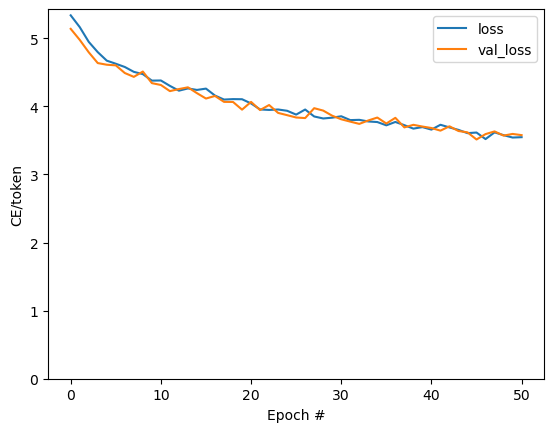

In [46]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, max(plt.ylim())])
plt.xlabel('Epoch #')
plt.ylabel('CE/token')
plt.legend()

## Attention Plots

τρέχουμε το μοντέλο πάνω στην εικόνα που κατεβάσαμε

In [49]:
result = model.simple_gen(image, temperature=1.0)
result

'a young girl in green shirt walks down water appearing out of water down shave it'

Σπάμε το αποτέλεσμα πάλι σε tokens

In [51]:
str_tokens = result.split()
str_tokens.append('[END]')

Τα `Decoder Layers` κρατούν το attention score για το `CrossAttentionLayer`. 

In [52]:
attn_maps = [layer.last_attention_scores for layer in model.decoder_layers]
[map.shape for map in attn_maps]

[TensorShape([1, 2, 17, 49]), TensorShape([1, 2, 17, 49])]

In [53]:
attention_maps = tf.concat(attn_maps, axis=0)
attention_maps = einops.reduce(
    attention_maps,
    'batch heads sequence (height width) -> sequence height width',
    height=7, width=7,
    reduction='mean')

In [54]:
einops.reduce(attention_maps, 'sequence height width -> sequence', reduction='sum')

<tf.Tensor: shape=(17,), dtype=float32, numpy=
array([1.        , 1.        , 0.99999994, 1.        , 1.        ,
       1.        , 1.0000001 , 1.        , 1.        , 1.        ,
       1.0000001 , 1.        , 1.        , 0.99999994, 1.        ,
       1.        , 1.        ], dtype=float32)>

Έτσι βλέπουμε που "πρόσεχε" το μοντέλο όταν έκανε την παραγωγή κειμένου

In [55]:
def plot_attention_maps(image, str_tokens, attention_map):
    fig = plt.figure(figsize=(16, 9))

    len_result = len(str_tokens)
    
    titles = []
    for i in range(len_result):
      map = attention_map[i]
      grid_size = max(int(np.ceil(len_result/2)), 2)
      ax = fig.add_subplot(3, grid_size, i+1)
      titles.append(ax.set_title(str_tokens[i]))
      img = ax.imshow(image)
      ax.imshow(map, cmap='gray', alpha=0.6, extent=img.get_extent(),
                clim=[0.0, np.max(map)])

    plt.tight_layout()

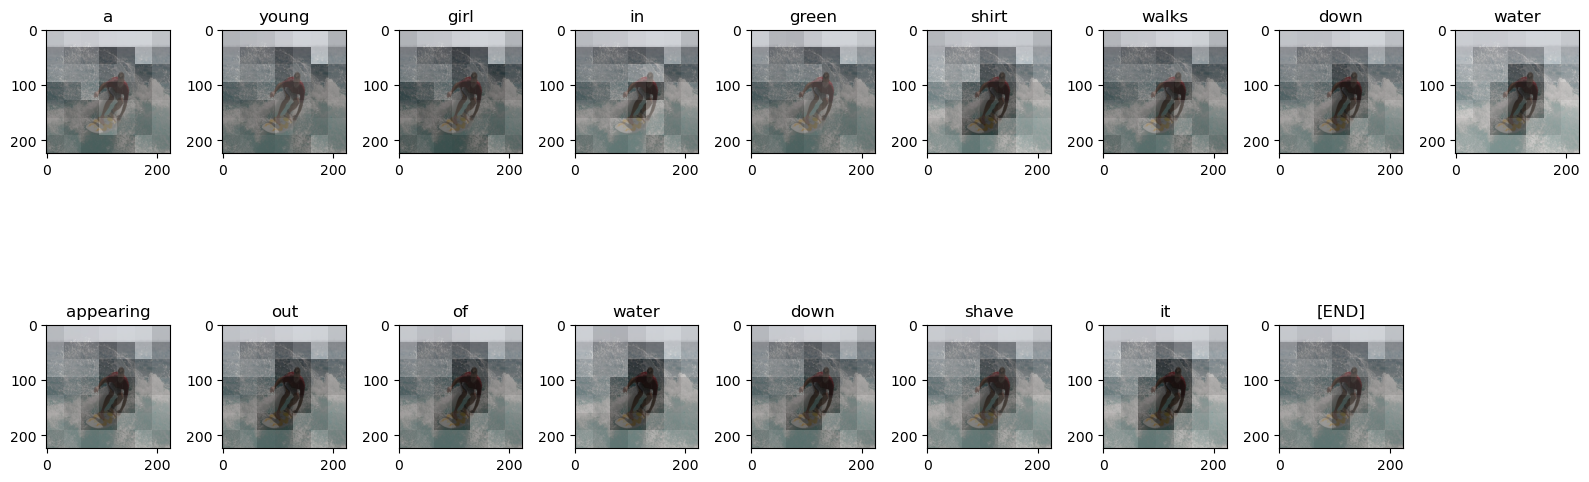

In [56]:
plot_attention_maps(image/255, str_tokens, attention_maps)

Τώρα, θα τα κάνουμε μέσω μιας συνάρτησης

In [57]:
@Captioner.add_method
def run_and_show_attention(self, image, temperature=0.0):
  result_txt = self.simple_gen(image, temperature)
  str_tokens = result_txt.split()
  str_tokens.append('[END]')

  attention_maps = [layer.last_attention_scores for layer in self.decoder_layers]
  attention_maps = tf.concat(attention_maps, axis=0)
  attention_maps = einops.reduce(
      attention_maps,
      'batch heads sequence (height width) -> sequence height width',
      height=7, width=7,
      reduction='mean')
  
  plot_attention_maps(image/255, str_tokens, attention_maps)
  t = plt.suptitle(result_txt)
  t.set_y(1.05)


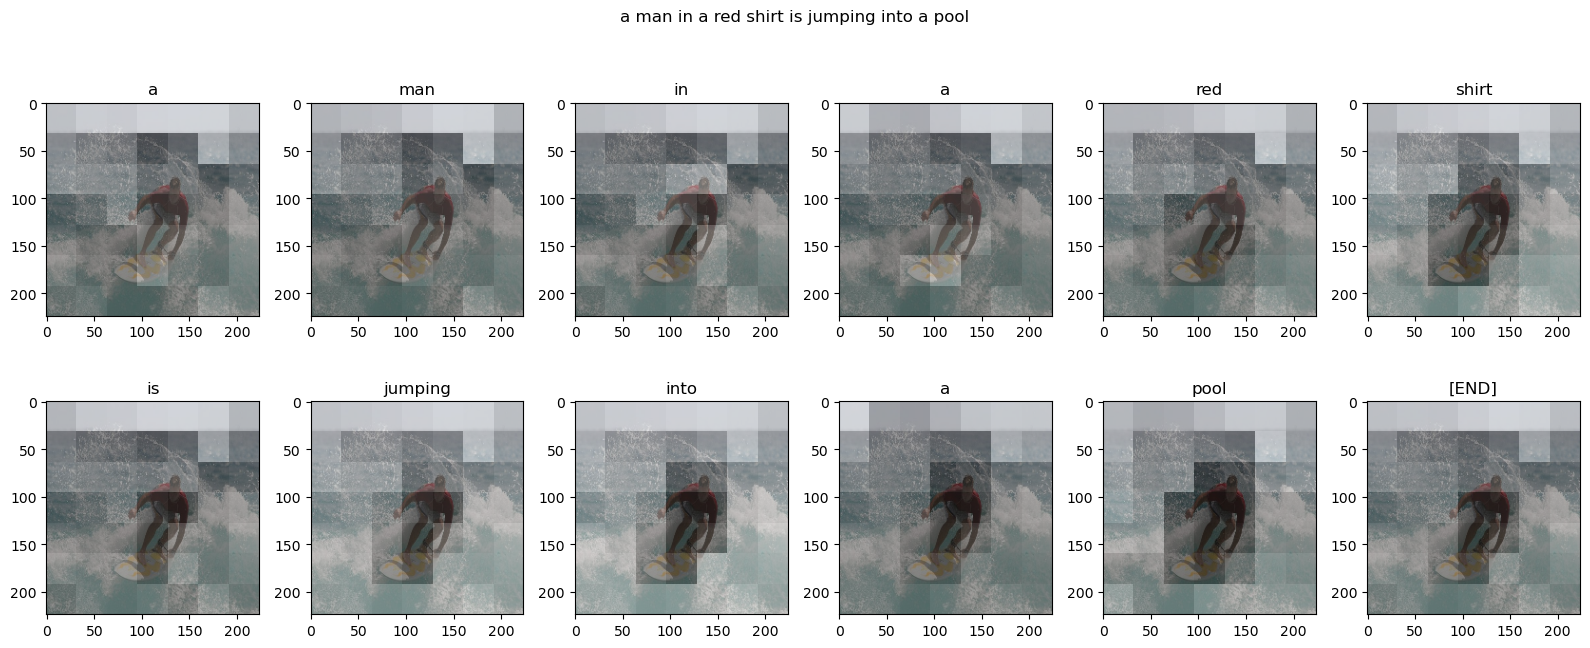

In [58]:
run_and_show_attention(model, image)

## Αξιολόγηση της ποιότητας του captioning (BLEU)

Για να παραχθεί ένα caption για μια εικόνα, πρώτα την φορτώνουμε με τη
μέθοδο `image = load_image(image_path)` και στη συνέχεια καλούμε τη
μέθοδο `model.simple_gen(image)`.

Η NLTK στο
[nltk.translate.bleu_score](https://www.nltk.org/_modules/nltk/translate/bleu_score.html)
παρέχει τις απαραίτητες συναρτήσεις για τον υπολογισμό των BLEU scores:

-   Για να μπορείτε να αξιολογούμε το captioning ενός μεμονωμένου
    παραδείγματος φτιάχνουμε μια συνάρτηση που να υπολογίζει την
    `sentence_bleu` μεταξύ hypothesis και αληθινών captions (references)
    για μια εικόνα.
-   Για να αξιολογούμε το captioning περισσότερων εικόνων πχ ενός μέρους
    ή όλου του test set φτιάχνουμε συνάρτηση που θα υπολογίζει την
    `corpus_bleu` μεταξύ όλων των hypotheses και references των εικόνων
    που του δίνονται. Σημειώστε ότι το `corpus_bleu` δεν είναι μέσος
    όρος των `sentence_bleu`.

In [59]:
from nltk.translate.bleu_score import sentence_bleu, corpus_bleu, SmoothingFunction

weights = (0.4, 0.3, 0.2, 0.1)
smoothing_function = SmoothingFunction().method1

In [60]:
def sentence_bleu_score(index):
  path = test_captions[index][0]
  image = load_image(path)
  hypothesis = (model.simple_gen(image, temperature=1.0)).split()
  sentences = test_captions[index][1]

  sentences = list(map(lambda x : (x[:-2]).split(), sentences))

  return sentence_bleu(sentences, hypothesis, weights, smoothing_function)

In [61]:
sentence_bleu_score(8)

0.042211372973974134

In [62]:
def corpus_bleu_score(indices):

  sentences_list = []
  hypotheses = []

  for index in indices:
    path = test_captions[index][0]
    image = load_image(path)
    hypotheses.append((model.simple_gen(image, temperature=1.0)).split())
    sentences = test_captions[index][1:]
    sentences = list(map(lambda x : (x[:-2]).split(), sentences[0]))
    sentences_list.append(sentences)

  return corpus_bleu(sentences_list, hypotheses, weights, smoothing_function)

In [63]:
corpus_bleu_score(range(100))

0.08813033293703959

To score είναι εξαιρετικά χαμηλό. Κάπως αναμενόμενο, είχαμε 50 εποχές, με λίγα βήματα ανα εποχή και καμία προεπεξεργασία δεδομένων ή finetuning στρωμάτων και παραμέτρων.